In [1]:
import tensorflow as tf

print(tf.version.VERSION)  # Afișez versiunea TensorFlow
print(tf.config.list_physical_devices('GPU')) # Informații despre dispozitivele GPU disponibile

build_info = tf.sysconfig.get_build_info()
print(build_info['cuda_version']) # Versiunea CUDA
print(build_info['cudnn_version']) # Versiunea CUDNN



2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
64_110
64_8


In [2]:
import sys
print(sys.executable) # Calea executabilului Python folosit ca interpretor

c:\Users\radu2\anaconda3\envs\gputf\python.exe


**Importare librării**

In [3]:
import os                         # Interacțiunea cu sistemul de operare pentru manipularea fișierelor și directoarelor
import tarfile                    # Manipularea fișierelor tar
import urllib.request             # Descarc fișiere de pe Internet
from os import listdir            # Manipularea fișierelor și directoarelor
from os.path import isdir, join  

import pydub
from pydub import AudioSegment    # Conversia și redimensionarea fișierelor audio
import numpy as np                # Operații cu matrice și vectori
import python_speech_features     # Extragerea de caracteristici din semnalele audio
import tensorflow as tf           # Construirea, antrenarea și evaluarea modelelor de învățare profundă
import librosa                    # Analiza și prelucrarea semnalelor audio - încărcarea și redimensionarea fișierelor audio

import random                     # Generarea de numere aleatoare - shuffle
import matplotlib.pyplot as plt   # Crearea de grafice și vizualizări
from IPython.display import Audio # Instrument pentru redarea fișierelor audio



c:\Users\radu2\anaconda3\envs\gputf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## **1 Colectarea datelor**

In [4]:
# import urllib.request
# import os

# url = 'http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz'
# filename = 'speech_commands_v0.02.tar.gz'
# local_tar = os.path.join(os.getcwd(), filename)

# if not os.path.exists(local_tar):
#     # descarcă fișierul
#     urllib.request.urlretrieve(url, local_tar)
    
# remote_size = int(urllib.request.urlopen(url).headers['Content-Length'])
# local_size = os.path.getsize(local_tar)

# # verifică dimensiunea fișierului local
# if os.path.exists(local_tar) and local_size!=remote_size:
#     urllib.request.urlretrieve(url, local_tar)
# else:
#         print(f"Fișierul {filename} a fost descărcat complet.")



In [5]:
# output_dir = 'speech_commands'

# if not os.path.isdir(output_dir) or not os.path.exists(os.path.join(output_dir, 'LICENSE')):
#     os.makedirs(output_dir, exist_ok=True)

#     with tarfile.open(archive_path, 'r') as tar:
#         tar.extractall(output_dir)
#     print(f"Archive '{archive_filename}' extracted to '{output_dir}'.")
# else:
#     print('Directorul există deja, ignor extragerea arhivei.')

In [6]:
#Celula de cod 1.1.1
# Setez calea către setul de date colectat.
dataset_folder_path = 'E:\\CorpusDeNumere\\BazaDeDateCorpus\\SpeechCommandsV02' 
#dataset_folder_path = 'speech_commands/' 

for name in os.listdir(dataset_folder_path):
  if os.path.isdir(os.path.join(dataset_folder_path, name)):
    print(name)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [7]:
#Celula de cod 1.1.2
# Vector de subfoldere conținute în setul de date.
dataset_subfolders = [name for name in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, name))]
print(dataset_subfolders)
print(type(dataset_subfolders))

# Număr câte fișiere am în fiecare subfolder.
num_samples = 0
for subfolder in dataset_subfolders:
  print(subfolder, len(os.listdir(os.path.join(dataset_folder_path, subfolder))))
  num_samples += len(os.listdir(os.path.join(dataset_folder_path, subfolder)))
print('Total fișiere:', num_samples)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']
<class 'list'>
backward 1664
bed 2014
bird 2064
cat 2031
dog 2128
down 3917
eight 3787
five 4052
follow 1579
forward 1557
four 3728
go 3880
happy 2054
house 2113
learn 1575
left 3801
marvin 2100
nine 3934
no 3941
off 3745
on 3845
one 3890
right 3778
seven 3998
sheila 2022
six 3860
stop 3872
three 3727
tree 1759
two 3880
up 3723
visual 1592
wow 2123
yes 4044
zero 4052
_background_noise_ 7
Total fișiere: 105836


In [8]:
#Celula de cod 1.1.2
# Vector de subfoldere conținute în setul de date.
dataset_subfolders = [name for name in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, name))]

# Număr câte fișiere am în fiecare subfolder.
num_samples = 0
num_samples_per_class = {}
for subfolder in dataset_subfolders:
  num_files = len(os.listdir(os.path.join(dataset_folder_path, subfolder)))
  num_samples_per_class[subfolder] = num_files
  num_samples += num_files
print('Total fișiere:', num_samples)

# Calculez și afișez procentul pentru fiecare categorie.
for subfolder, num_files in num_samples_per_class.items():
  percentage = (num_files / num_samples) * 100
  print(f'Categoria {subfolder}: {percentage:.2f}% ({num_files} fișiere)')


Total fișiere: 105836
Categoria backward: 1.57% (1664 fișiere)
Categoria bed: 1.90% (2014 fișiere)
Categoria bird: 1.95% (2064 fișiere)
Categoria cat: 1.92% (2031 fișiere)
Categoria dog: 2.01% (2128 fișiere)
Categoria down: 3.70% (3917 fișiere)
Categoria eight: 3.58% (3787 fișiere)
Categoria five: 3.83% (4052 fișiere)
Categoria follow: 1.49% (1579 fișiere)
Categoria forward: 1.47% (1557 fișiere)
Categoria four: 3.52% (3728 fișiere)
Categoria go: 3.67% (3880 fișiere)
Categoria happy: 1.94% (2054 fișiere)
Categoria house: 2.00% (2113 fișiere)
Categoria learn: 1.49% (1575 fișiere)
Categoria left: 3.59% (3801 fișiere)
Categoria marvin: 1.98% (2100 fișiere)
Categoria nine: 3.72% (3934 fișiere)
Categoria no: 3.72% (3941 fișiere)
Categoria off: 3.54% (3745 fișiere)
Categoria on: 3.63% (3845 fișiere)
Categoria one: 3.68% (3890 fișiere)
Categoria right: 3.57% (3778 fișiere)
Categoria seven: 3.78% (3998 fișiere)
Categoria sheila: 1.91% (2022 fișiere)
Categoria six: 3.65% (3860 fișiere)
Categoria

## **1.2 Extragere caracteristici din datele de intrare**

In [9]:
# Celula de cod 1.2.1
# Parametri preliminari:
target_list = dataset_subfolders
feature_sets_file = 'dataset_subfolders_mfcc_sets.npz'
samples_percentage = 1            # Procentul de eșantioane care urmează să fie alese aleatoriu din setul de date
val_ratio = 0.2                   # Raportul probelor utilizate pentru validare (din procentul ales aleatoriu)
test_ratio = 0.1                  # Raportul probelor utilizate pentru testare (din procentul ales aleatoriu)
sample_rate = 8000                # Frecvența de eșantionare a probelor audio
num_mfcc = 16                     # Numărul de mfcc de generat
len_mfcc = 98  #MODIFICAT din 50                   # Lungimea matricei mffc pentru un singur enunț audio

neg_labels_percent = 0.3          # Procentul de mostre „negative” pe care le păstrez 
wake_words = ['stop', 'go', 'left', 'right', 'visual', 'bed','up', 'down', 'follow','marvin']      # Cuvinte de trezire care trebuie folosite
#wake_words = ['on', 'off', 'up', 'down', 'visual', 'bed']   

In [10]:
# Celula de cod 1.2.2
# Creez o listă de nume de fișiere cu calea lor completă și vectorii de etichete

filenames = []
y = []
wake_word_index_vec = []
not_wake_word_index_vec = []

for index, target in enumerate(target_list): #Cu metoda enumerate obțin index-ul și valoarea elementului
  print(os.path.join(dataset_folder_path, target))
  
  filenames.append(os.listdir(os.path.join(dataset_folder_path, target)))
  y.append(np.ones(len(filenames[index])) * index)

  if target not in wake_words:
    filenames[index] = filenames[index][:int(len(os.listdir(os.path.join(dataset_folder_path, target)))*neg_labels_percent)] #pastrez doar primele :N elemente
    y[index] = y[index][:int(len(os.listdir(os.path.join(dataset_folder_path, target)))*neg_labels_percent)]
    not_wake_word_index_vec.append(index)
  else:
    wake_word_index_vec.append(index)

# Vectorii cu numele fișierelor și etichetele lor
filenames = [item for sublist in filenames for item in sublist]#Aplatizez lista de liste(3 nivele) la o listă simplă
y = [item for sublist in y for item in sublist]

print('Numărul de monstre selectate:', len(filenames))

print('Sunt cuvinte de activare:', wake_word_index_vec)
print('Nu sunt cuvinte de activare:', not_wake_word_index_vec)

# print(filenames)
# print(y)

E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\backward
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\bed
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\bird
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\cat
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\dog
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\down
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\eight
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\five
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\follow
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\forward
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\four
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\go
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\happy
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\house
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\learn
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\left
E:\CorpusDeNumere\BazaDeDateCorpus\SpeechCommandsV02\marvin
E:\C

In [11]:
# Celula de cod 1.2.3
# Asociez numele fișierelor cu etichete și le amestec
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

# Păstrez procentul de mostre definit anterior
print('Numărul total de eșantioane din setul de date:', len(filenames))
filenames = filenames[:int(len(filenames) * samples_percentage)]
print('Numărul de mostre păstrate:', len(filenames))

Numărul total de eșantioane din setul de date: 52921
Numărul de mostre păstrate: 52921


In [12]:
# Celula de cod 1.2.4
# Calculez dimensiunile seturilor de validare și de testare
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

# Împart setul de date în seturi de: antrenare, validare și testare.
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

# La fel pentru vectorul de etichete.
y_raw_val = y[:val_set_size]
y_raw_test = y[val_set_size:(val_set_size + test_set_size)]
y_raw_train = y[(val_set_size + test_set_size):]

print(len(filenames_val), len(filenames_test),len(filenames_train))

10584 5292 37045


In [13]:
# Celula de cod 1.2.5
# Funcție pentru a crea MFCC
def calc_mfcc_delta(path):
  
  # Încarc fișierul wav
  signal, fs = librosa.load(path, sr=sample_rate)

  # Generez MFCC din clipul de sunet
  mfccs = python_speech_features.base.mfcc(signal,
                                          samplerate=fs,
                                          winlen=0.03,      #Modificat din 0.02#  default este 0.025 # 0.03 cu 0.01 pentru shape de 32,98
                                          winstep=0.01,      #Modificat din 0.02 # default este 0.01
                                          numcep=num_mfcc,
                                          nfilt=26,
                                          nfft=512,         
                                          preemph=0.0,
                                          ceplifter=0,
                                          appendEnergy=True,
                                          winfunc=np.hanning)
  #Calculez caracteristicile delta pe baza cadrelor vecine
  delta = python_speech_features.base.delta(mfccs, 2)

  mfccs_delta = np.append(mfccs, delta, axis=1) # Concatenez cele doua matrici pe axa orizontala.

  return mfccs_delta.transpose()

In [14]:
print(target_list)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [15]:
# Celula de cod 1.2.6
#=======  TEST  =======#
# Calculez MFCC pentru 500 de fișiere WAV
prob_cnt = 0
x_tmp = []
y_tmp = []
for index, filename in enumerate(filenames_train):

  if index >= 500:
    break

  # Creați calea de la numele fișierului și elementul țintă dat
  path = join(dataset_folder_path, target_list[int(y_raw_train[index])],
              filename)

  # Generare MFCCs
  mfccs = calc_mfcc_delta(path)

  if mfccs.shape[1] == len_mfcc:    # Verificați dacă există fișiere corupte
    x_tmp.append(mfccs)
    y_tmp.append(y_raw_train[index])
  else:
    print('Dropped:', index, mfccs.shape)
    prob_cnt += 1

print('Procentul de monstre problemantice: ', prob_cnt / 500)    

Dropped: 6 (32, 88)
Dropped: 18 (32, 68)
Dropped: 22 (32, 96)
Dropped: 23 (32, 67)
Dropped: 34 (32, 80)
Dropped: 36 (32, 84)
Dropped: 46 (32, 71)
Dropped: 47 (32, 71)
Dropped: 49 (32, 80)
Dropped: 54 (32, 62)
Dropped: 56 (32, 80)
Dropped: 58 (32, 80)
Dropped: 73 (32, 84)
Dropped: 84 (32, 58)
Dropped: 95 (32, 75)
Dropped: 97 (32, 84)
Dropped: 99 (32, 74)
Dropped: 104 (32, 84)
Dropped: 109 (32, 91)
Dropped: 114 (32, 88)
Dropped: 115 (32, 73)
Dropped: 116 (32, 31)
Dropped: 121 (32, 96)
Dropped: 125 (32, 88)
Dropped: 130 (32, 67)
Dropped: 181 (32, 67)
Dropped: 193 (32, 71)
Dropped: 213 (32, 97)
Dropped: 223 (32, 96)
Dropped: 234 (32, 87)
Dropped: 236 (32, 84)
Dropped: 237 (32, 87)
Dropped: 247 (32, 49)
Dropped: 277 (32, 67)
Dropped: 287 (32, 97)
Dropped: 291 (32, 97)
Dropped: 303 (32, 97)
Dropped: 326 (32, 54)
Dropped: 354 (32, 58)
Dropped: 362 (32, 73)
Dropped: 370 (32, 88)
Dropped: 383 (32, 88)
Dropped: 393 (32, 84)
Dropped: 400 (32, 92)
Dropped: 408 (32, 73)
Dropped: 411 (32, 91)
Droppe

MFCCs: [[-1.24315414e+01 -1.26428093e+01 -1.28727626e+01 ... -9.23921415e+00
  -8.47548271e+00 -7.96427058e+00]
 [ 8.12642776e+00  5.44316631e+00  3.74606894e+00 ...  5.70965893e+00
   6.78355482e+00  6.89113552e+00]
 [-5.81594365e-01 -2.48569345e+00 -2.67212787e+00 ... -6.19684348e-01
  -1.22712769e+00 -4.71468279e-01]
 ...
 [-3.62070397e-02  9.04095977e-02  2.67004339e-01 ...  1.11879589e-01
  -6.78316005e-02 -1.55034589e-02]
 [ 8.80309578e-02  1.26885257e-01  2.74529725e-01 ...  2.68336438e-01
   2.31726552e-02 -1.88895338e-02]
 [-7.09656134e-02  1.28595252e-02  9.28467718e-02 ...  2.82998368e-01
   2.21679424e-01  1.39339533e-01]]
(32, 98)
three


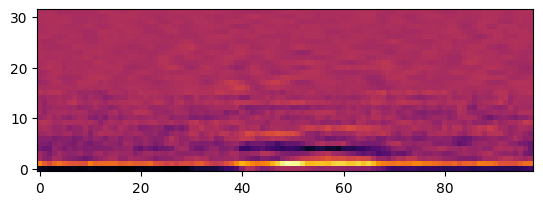

In [16]:
# Celula de cod 1.2.7
#=======  TEST  =======#
# Analizez mostrele corupte

file_idx = 450 # Indexul unui eșantion corupt

# Creez calea de la numele fișierului și elementul țintă dat
path = join(dataset_folder_path, target_list[int(y_raw_train[file_idx])],
            filenames_train[file_idx])

# Generare MFCCs
mfccs = calc_mfcc_delta(path)
print('MFCCs:', mfccs)
print(mfccs.shape)

# Plotare MFCCs
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# Redare eșantion
print(target_list[int(y_raw_train[file_idx])])
Audio(filename=path)

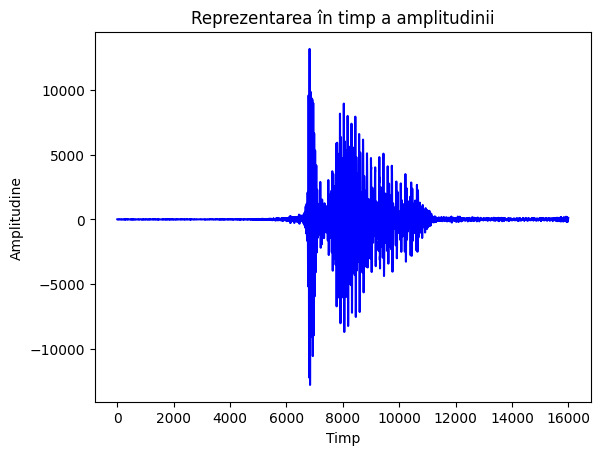

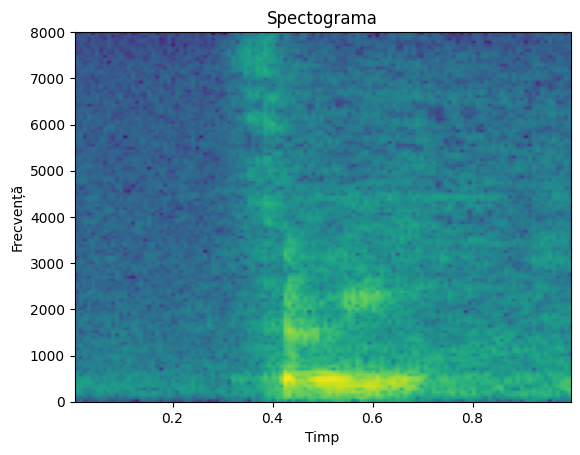

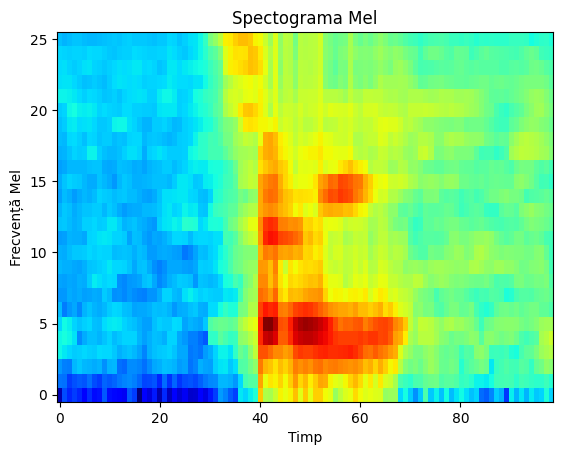

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
from python_speech_features import mfcc, delta, logfbank

# Calea către fișierul audio
file_idx = 450 # Indexul unui eșantion corupt

# Creez calea de la numele fișierului și elementul țintă dat
path = join(dataset_folder_path, target_list[int(y_raw_train[file_idx])],
            filenames_train[file_idx])
audio_file_path = path

# Citire fișier audio
rate, signal = wavfile.read(audio_file_path)

# Calcul MFCC și delta MFCC
mfcc_feat = mfcc(signal, rate)
delta_feat = delta(mfcc_feat, 2)

# Vizualizare reprezentarea în timp a amplitudinii
fig, ax = plt.subplots()
ax.plot(signal, color='blue')
ax.set(xlabel='Timp', ylabel='Amplitudine',
       title='Reprezentarea în timp a amplitudinii')
plt.show()

# Spectograma
fig, ax = plt.subplots()
ax.specgram(signal, Fs=rate)
ax.set(xlabel='Timp', ylabel='Frecvență',
       title='Spectograma')
plt.show()

# Spectograma Mel
fig, ax = plt.subplots()
fbank_feat = logfbank(signal, rate, nfilt=26, nfft=512)
ax.imshow(fbank_feat.T, aspect='auto', origin='lower', cmap='jet')
ax.set(xlabel='Timp', ylabel='Frecvență Mel',
       title='Spectograma Mel')
plt.show()


In [18]:
# Celula de cod 1.2.8
# Funcție pentru extragerea caracteristicilor și eliminarea mostrelor corupte
def extract_features(in_files, in_y):
  prob_cnt = 0
  out_x = []
  out_y = []

  for index, filename in enumerate(in_files):

    # Creare cale de la numele fișierului și elementul țintă dat
    path = join(dataset_folder_path, target_list[int(in_y[index])], 
                filename)
    
    # Verific dacă fișierul vizat este WAV
    if not path.endswith('.wav'):
      continue

    # Generare MFCCs
    mfccs = calc_mfcc_delta(path)

    # Păstrez MFCCs cu lungimea dorită
    if mfccs.shape[1] == len_mfcc:
      out_x.append(mfccs)
      out_y.append(in_y[index])
    else:
      #print('Dropped:', index, mfccs.shape)
      prob_cnt += 1

  return out_x, out_y, prob_cnt

In [19]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    print("GPU disponibil: ", gpu)
else:
  print("Niciun GPU disponibil.")


GPU disponibil:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [20]:
# Celula de cod 1.2.9
# # Creez set de antrenare, validare si set de testare
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_raw_train)
print('Procent eliminat - antrenare:', prob / len(y_raw_train))
x_val, y_val, prob = extract_features(filenames_val, 
                                          y_raw_val)
print('Procent eliminat - validare :', prob / len(y_raw_val))
x_test, y_test, prob = extract_features(filenames_test, 
                                          y_raw_test)
print('Procent eliminat - testare:', prob / len(y_raw_test))
print()

Procent eliminat - antrenare: 0.10225401538669186
Procent eliminat - validare : 0.10402494331065759
Procent eliminat - testare: 0.09958427815570672



In [21]:
# Celula de cod 1.2.10
# Redenumesc etichetele în funcție de numărul de clase (număr de cuvinte de activare + eticheta „not_wake_word”)
for i, t in enumerate(y_train): #Voi avea indecși de la 0 la len(wake_words)
  if t in not_wake_word_index_vec:
    y_train[i] = len(wake_words) 
  else:
    y_train[i] = wake_word_index_vec.index(t)

for i, t in enumerate(y_val):
  if t in not_wake_word_index_vec:
    y_val[i] = len(wake_words)
  else:
    y_val[i] = wake_word_index_vec.index(t)

for i, t in enumerate(y_test):
  if t in not_wake_word_index_vec:
    y_test[i] = len(wake_words)
  else:
    y_test[i] = wake_word_index_vec.index(t)

wake_word_index_vec.append(len(wake_words))
print(wake_word_index_vec)


[1, 5, 8, 11, 15, 16, 22, 26, 30, 31, 10]


In [22]:
print(y_test[600:1000])

[10, 10, 9, 0, 10, 3, 10, 6, 7, 7, 5, 10, 6, 10, 5, 10, 6, 4, 5, 4, 9, 10, 1, 10, 10, 7, 3, 3, 10, 10, 2, 6, 10, 10, 6, 10, 4, 10, 6, 6, 0, 0, 10, 2, 3, 1, 10, 10, 7, 10, 7, 8, 10, 8, 10, 2, 4, 10, 10, 10, 10, 3, 10, 10, 2, 5, 10, 10, 6, 6, 1, 10, 1, 2, 10, 10, 10, 4, 1, 10, 3, 6, 10, 5, 0, 10, 10, 6, 10, 2, 2, 2, 1, 1, 4, 10, 10, 10, 1, 10, 10, 7, 4, 4, 6, 7, 8, 10, 8, 4, 8, 10, 3, 2, 10, 1, 7, 4, 0, 10, 2, 10, 3, 10, 10, 6, 10, 10, 10, 9, 6, 10, 10, 10, 6, 3, 6, 10, 10, 10, 7, 7, 10, 10, 6, 7, 10, 9, 10, 9, 8, 7, 3, 7, 8, 10, 7, 8, 9, 10, 10, 10, 6, 7, 8, 1, 0, 1, 10, 10, 1, 10, 6, 7, 0, 10, 8, 10, 10, 1, 3, 10, 7, 10, 3, 4, 7, 1, 10, 9, 0, 5, 10, 8, 5, 5, 10, 6, 6, 10, 10, 8, 10, 7, 10, 4, 6, 10, 1, 8, 6, 7, 6, 10, 10, 3, 9, 10, 1, 10, 10, 0, 10, 7, 5, 2, 10, 3, 10, 0, 10, 4, 10, 3, 2, 6, 10, 10, 10, 10, 10, 10, 7, 1, 4, 8, 3, 7, 8, 6, 10, 1, 10, 7, 6, 10, 10, 4, 4, 10, 3, 10, 9, 0, 5, 7, 8, 1, 10, 10, 5, 5, 10, 1, 10, 10, 10, 10, 10, 1, 1, 5, 6, 10, 10, 7, 5, 10, 10, 10, 2, 10, 2, 

## **1.3 Salvez și testez caracteristicile și etichetele vectorilor**

In [23]:
# Celula de cod 1.3.1
np.savez( feature_sets_file,
         x_train=x_train,
         y_train=y_train,
         x_val=x_val,
         y_val=y_val,
         x_test=x_test,
         y_test=y_test)

In [24]:
# Celula de cod 1.3.2
#=======  TEST  =======#
# Încărcare caracteristici
feature_sets = np.load( feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [25]:
# Celula de cod 1.3.3
#=======  TEST  =======#
wake_words_all = []
wake_words_all = wake_words + ['other']

print(wake_words_all, '\n')

print('SET DE ANTRENARE')
unique, counts = np.unique(feature_sets['y_train'], return_counts=True)
for ind in unique:
  print(wake_words_all[int(ind)-1], counts[int(ind)-1])

print('\n')
print('SET DE VALIDARE')
unique, counts = np.unique(feature_sets['y_val'], return_counts=True)
for ind in unique:
  print(wake_words_all[int(ind)-1], counts[int(ind)-1])

print('\n')
print('SET DE TESTARE')
unique, counts = np.unique(feature_sets['y_test'], return_counts=True)
for ind in unique:
  print(wake_words_all[int(ind)-1], counts[int(ind)-1])

['stop', 'go', 'left', 'right', 'visual', 'bed', 'up', 'down', 'follow', 'marvin', 'other'] 

SET DE ANTRENARE
other 14167
stop 1194
go 2492
left 1026
right 2426
visual 2454
bed 1292
up 2411
down 2494
follow 2287
marvin 1014


SET DE VALIDARE
other 4033
stop 332
go 727
left 276
right 692
visual 702
bed 373
up 692
down 711
follow 641
marvin 304


SET DE TESTARE
other 2023
stop 161
go 361
left 152
right 360
visual 346
bed 167
up 345
down 358
follow 341
marvin 151


# **2 Antrenarea modelului**


In [26]:
# Celula de cod 2.1.1
from tensorflow.keras import layers, models, activations    

In [27]:
# Celula de cod 2.1.2
feature_sets_file_path = feature_sets_file

feature_sets = np.load(feature_sets_file_path)
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [28]:
# Celula de cod 2.1.3
# Atribuire seturi de caracteristici 
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

# Verific dimensiunile tensorilor
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(feature_sets['y_val'][100:500])

(33257, 32, 98)
(9483, 32, 98)
(4765, 32, 98)
[ 6  7  1  8  6 10  7  6 10  0 10  4  7 10  6  3 10  6  1 10  7  1 10 10
 10  5 10  7  8  6  8  7  8 10  1  6  8  7  4  8 10  8  6  8  8 10 10 10
  9  7  2  2  6 10  0  3 10  4  6  4  9  8 10  8 10  1 10 10 10 10  7 10
  7  3 10 10 10 10 10 10  1 10  8 10  7 10 10  3  3 10  2  7  0  1  1  7
  3 10  0 10 10 10  1  1  2 10  2  7 10  9 10 10 10  7  6 10 10 10 10  4
 10 10  1 10  3  8  1 10  9  2  6  9  8  3  6  4 10  7 10  3  3 10  9  6
  5 10  8 10  6 10  0  3  6 10  4 10  7  4  9  7 10  6 10  7 10  7  7 10
 10  7  6 10  1  0  3  3  5  1  4 10 10 10  0  1  2  5  3  3  1  8 10  4
 10 10 10 10 10 10  4 10  4  7  5  7  7 10  8 10 10  7 10  8 10  4 10  7
 10  3  8  3  9  7  3 10 10  5 10 10  2 10 10  4 10  2 10 10  4  5 10  6
  1 10  7  6  5  9  2 10 10 10 10 10 10 10  9 10  7 10  8 10  6  0  1 10
 10  5 10 10  6  1  2  5 10 10 10 10  8  4 10 10  7  8 10  3 10 10 10 10
 10 10  3  7  6 10 10  4  3 10  9 10  7  0  9 10 10  6  4  7 10  8  3 10
 10 1

In [29]:
# Celula de cod 2.1.4
# CNN pentru TF necesită (batch, height, width, channels)
# Remodelez tensorii de intrare cu un canal „culoare” de 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(type(x_train))

(33257, 32, 98, 1)
(9483, 32, 98, 1)
(4765, 32, 98, 1)
<class 'numpy.ndarray'>


In [30]:
# Celula de cod 2.1.5
# Forma tensorului de intrare pentru CNN este matricea MFCC pentru un eșantion
sample_shape=x_test.shape[1:]
print(sample_shape)

(32, 98, 1)


In [31]:
# Celula de cod 2.1.6
# Convertesc vectorii de etichete într-o matrice de etichete binare (one-hot encoded).
from tensorflow.keras import utils

total_classes=len(wake_words)+1 
print(total_classes)

y_train_bin = utils.to_categorical(y_train, num_classes=total_classes, dtype="float64")
y_val_bin = utils.to_categorical(y_val, num_classes=total_classes, dtype="float64")
y_test_bin = utils.to_categorical(y_test, num_classes=total_classes, dtype="float64")


11


In [32]:
# Celula de cod 2.1.7
# Cu ce procent apare în etichetele de testare fiecare "wake_word"
# print(sum(y_val_bin) / len(y_val_bin))
# print(1 - sum(y_val_bin) / len(y_val_bin))
print(sum(y_test_bin) / len(y_test_bin))
print(y_test_bin[100:200])

[0.03378804 0.07576076 0.03189927 0.07555089 0.0726128  0.03504722
 0.07240294 0.07513116 0.07156348 0.0316894  0.42455404]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### 2.2 VGG16

Bazat pe:  
https://github.com/geifmany/cifar-vgg/blob/master/cifar10vgg.py  
https://www.geeksforgeeks.org/python-image-classification-using-keras/  

In [33]:
# Celula de cod 2.2.1
from tensorflow.keras import layers, models, activations, optimizers, regularizers

def vgg16(input_shape = (32,32,3), classes = 10):
    
    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(input_layer) # Primul strat convolutional
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Conv2D(64, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 2
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)

    x = layers.Conv2D(128, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 3
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(128, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 4
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)

    x = layers.Conv2D(256, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 5
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(256, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 6
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(256, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 7
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)
    
    x = layers.Conv2D(512, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 8
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(512, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 9
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(512, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 10
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)
    
    x = layers.Conv2D(512, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 11
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(512, (3, 3), 
                      activation='relu', 
                      padding='same', 
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 12
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    x = layers.Conv2D(512, (3, 3), 
                      activation='relu', 
                      padding='same',
                      kernel_regularizer=regularizers.l2(0.0005))(x)  # 13 
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x) #14
    
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x) #15
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(classes)(x) #16
    out = layers.Activation('softmax')(x)
    
    model = models.Model(input_layer, out, name='vgg16')

    return model

### 2.3 Alexnet
Bazat pe:  
https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf  
https://towardsdatascience.com/alexnet-8b05c5eb88d4  

In [34]:
# Celula de cod 2.2.2
from tensorflow.keras import layers, models, activations, optimizers


# In varianta originala este folosit Local Response Normalization in loc de Batch Normalization.

def alexNet(input_shape = (224,224,3), classes = 11):

    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(filters=96,
              kernel_size=7,
              strides=2,
              padding='same',
              activation='relu')(input_layer)  # 1 
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(pool_size=(3,2), strides=2)(x)

    x = layers.Conv2D(filters=256,
              kernel_size=5,
              padding='same',
              activation='relu')(x)  # 2
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(pool_size=(3,2), strides=2)(x)


    x = layers.Conv2D(filters=384,
              kernel_size=3,
              padding='same',
              activation='relu')(x)  # 3

    # x = layers.Conv2D(filters=384,
    #           kernel_size=3,
    #           padding='same',
    #           activation='relu')(x)  # 4

    x = layers.Conv2D(filters=256,
              kernel_size=3,
              padding='same',
              activation='relu')(x)  # 5
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(pool_size=(3,2), strides=2)(x)

    x = layers.Flatten()(x)
    # x = layers.Dense(units=4096, activation='relu')(x)
    x = layers.Dense(units=4096, activation='relu')(x)
    x = layers.Dropout(rate=0.5)(x)

    output = layers.Dense(units=classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output, name='alexnet')

    return model

### 2.4 SqueezeNet

Bazat pe: https://arxiv.org/abs/1312.4400

https://github.com/zshancock/SqueezeNet_vs_CIFAR10

In [35]:
# Celula de cod 2.2.3
from tensorflow.keras import layers, models, activations, optimizers

def fire_mod(x, fire_id, squeeze=16, expand=64):
    
    # Convenția de denumire a componentelor modulului de incendiu
    squeeze1x1 = 'squeeze1x1'
    expand1x1 = 'expand1x1'
    expand3x3 = 'expand3x3'
    relu = 'relu.'
    fid = 'fire' + str(fire_id) + '/'
    
    # Definesc stratul de comprimare ~ (1,1) filtru
    x = layers.Convolution2D(squeeze, (1,1), padding = 'valid', name= fid + squeeze1x1)(x)
    x = layers.Activation('relu', name= fid + relu + squeeze1x1)(x)
    
    # Definesc filtrele stratului de extindere (1,1).
    expand_1x1 = layers.Convolution2D(expand, (1,1), padding='valid', name= fid + expand1x1)(x)
    expand_1x1 = layers.Activation('relu', name= fid + relu + expand1x1)(expand_1x1)
    
    # Definesc filtrele stratului de extindere (3,3).
    expand_3x3 = layers.Convolution2D(expand, (3,3), padding='same', name= fid + expand3x3)(x)  
    expand_3x3 = layers.Activation('relu', name= fid + relu + expand3x3)(expand_3x3)
    
    # Concatenare
    x = layers.concatenate([expand_1x1, expand_3x3], axis = 3, name = fid + 'concat')
    
    return x

In [36]:
# Celula de cod 2.2.4
#
def squeezeNet(input_shape = (32,32,3), classes = 10):
        
    input_layer = layers.Input(shape=input_shape)
    
    x = layers.Convolution2D(64, (3, 3), strides=(2, 2), padding='valid', name='conv', kernel_regularizer=regularizers.l2(0.0005))(input_layer) # Regularizer added to address overfitting
    x = layers.Activation('relu', name='relu_conv1')(x)
    x = layers.BatchNormalization()(x)  # Adăugat pentru a evita overfitting-ul.
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_mod(x, fire_id=2, squeeze=16, expand=64)
    x = fire_mod(x, fire_id=3, squeeze=16, expand=64)
    x = layers.BatchNormalization()(x)  

    x = fire_mod(x, fire_id=4, squeeze=32, expand=128)
    x = fire_mod(x, fire_id=5, squeeze=32, expand=128)
    x = layers.Dropout(0.6, name='drop9')(x) # Adăugat pentru a evita overfitting-ul.

    x = layers.Convolution2D(classes, (1, 1), padding='valid', name='conv10')(x)
    x = layers.Activation('relu', name='relu_conv10')(x)
    x = layers.GlobalAveragePooling2D()(x)
    out = layers.Activation('softmax', name= 'output')(x)

    model = models.Model(input_layer, out, name='squeezenet')

    return model

### 2.3 Alegerea retelei si antrenarea propriu-zisa

In [37]:
selected_model = 'alexnet'


In [38]:
# # Celula de cod 2.3.1
# lr_schedule = optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.96)

In [39]:
# # Celula de cod 2.3.2
# if selected_model == 'alexnet':
#   model = alexNet(input_shape=[32,len_mfcc,1], classes=total_classes) 
  
#   model.compile(loss='categorical_crossentropy', 
#               optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
#               metrics=['acc'])
#   model_filename = 'alexnet_wake_word_model.h5'

# elif selected_model == 'vgg16':
#   model = vgg16(input_shape=[32,len_mfcc,1], classes=total_classes)

#   model.compile(loss='categorical_crossentropy', 
#               optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
#               metrics=['acc'])

#   model_filename = 'vgg16_wake_word_model.h5'

# elif selected_model == 'squeezenet':
#   model = squeezeNet(input_shape=[32,len_mfcc,1], classes=total_classes)

#   model.compile(loss='categorical_crossentropy', 
#               optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
#               metrics=['acc'])
#   model_filename = 'squeezenet_wake_word_model.h5'

In [40]:
# Celula de cod 2.3.2


if selected_model == 'vgg16':
  model = vgg16(input_shape=[32,len_mfcc,1], classes=total_classes)
  model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['acc'])
  model_filename = 'vgg16_wake_word_model.h5'
  
elif selected_model == 'alexnet':
  model = alexNet(input_shape=[32,len_mfcc,1], classes=total_classes) 
  model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['acc'])
  model_filename = 'alexnet_wake_word_model.h5'

elif selected_model == 'squeezenet':
  model = squeezeNet(input_shape=[32,len_mfcc,1], classes=total_classes)
  model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['acc'])
  model_filename = 'squeezenet_wake_word_model.h5'

Model: "alexnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 98, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 49, 96)        4800      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 49, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 24, 96)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 24, 256)        614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 24, 256)        1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 12, 256)        0   

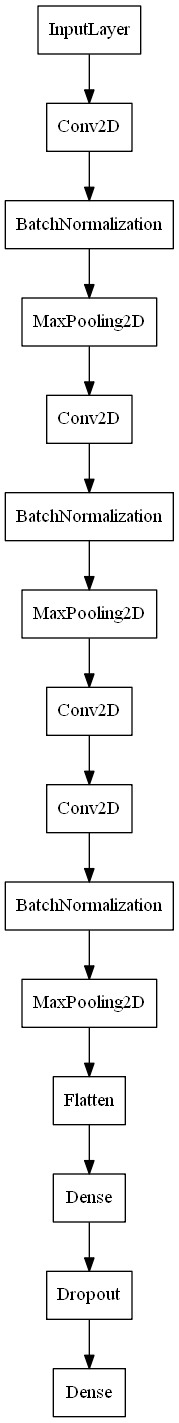

In [41]:
# Celula de cod 2.3.3
# Afișare model
from tensorflow.keras import utils
model.summary()
tf.keras.utils.plot_model(model, show_layer_names=False)

In [42]:
# Celula de cod 2.3.4
# Antrenare
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val_bin))
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(64)

batch_shape = val_dataset.element_spec[0].shape
print(batch_shape)
print(val_dataset.element_spec)

history = model.fit(x_train,  
                    y_train_bin, 
                    steps_per_epoch=x_train.shape[0] // 128,
                    epochs=250, 
                    batch_size=128, 
                    # validation_data=(x_val, y_val_bin))
                    validation_data=val_dataset)

(None, 32, 98, 1)
(TensorSpec(shape=(None, 32, 98, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 11), dtype=tf.float64, name=None))
Epoch 1/250
259/259 [==============================] - 22s 53ms/step - loss: 2.2912 - acc: 0.4311 - val_loss: 1.4642 - val_acc: 0.5208
Epoch 2/250
259/259 [==============================] - 14s 49ms/step - loss: 0.6678 - acc: 0.7698 - val_loss: 0.5339 - val_acc: 0.8200
Epoch 3/250
259/259 [==============================] - 13s 49ms/step - loss: 0.3725 - acc: 0.8739 - val_loss: 0.4630 - val_acc: 0.8440
Epoch 4/250
259/259 [==============================] - 13s 48ms/step - loss: 0.2829 - acc: 0.9045 - val_loss: 0.3909 - val_acc: 0.8705
Epoch 5/250
259/259 [==============================] - 13s 50ms/step - loss: 0.2114 - acc: 0.9287 - val_loss: 0.3083 - val_acc: 0.8994
Epoch 6/250
259/259 [==============================] - 13s 49ms/step - loss: 0.1640 - acc: 0.9453 - val_loss: 0.2952 - val_acc: 0.9028
Epoch 7/250
259/259 [=========================

In [ ]:
#Celula de cod 2.3.5
# Calculez si afisez metrici
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

avg_acc = sum(acc) / len(acc)
print("Acuratețea medie de antrenament:", avg_acc)

avg_loss = sum(loss) / len(loss)
print("Pierdere medie la antrenament:", avg_loss)

avg_vacc = sum(val_acc) / len(val_acc)
print("Acuratețea medie de validare:", avg_vacc)

avg_vloss = sum(val_loss) / len(val_loss)
print("Pierdere medie la validare:", avg_vloss)

Acuratețea medie de antrenament: 0.9745902578830719
Pierdere medie la antrenament: 0.49994263845682146
Acuratețea medie de validare: 0.9425954278111458
Pierdere medie la validare: 0.652582789182663


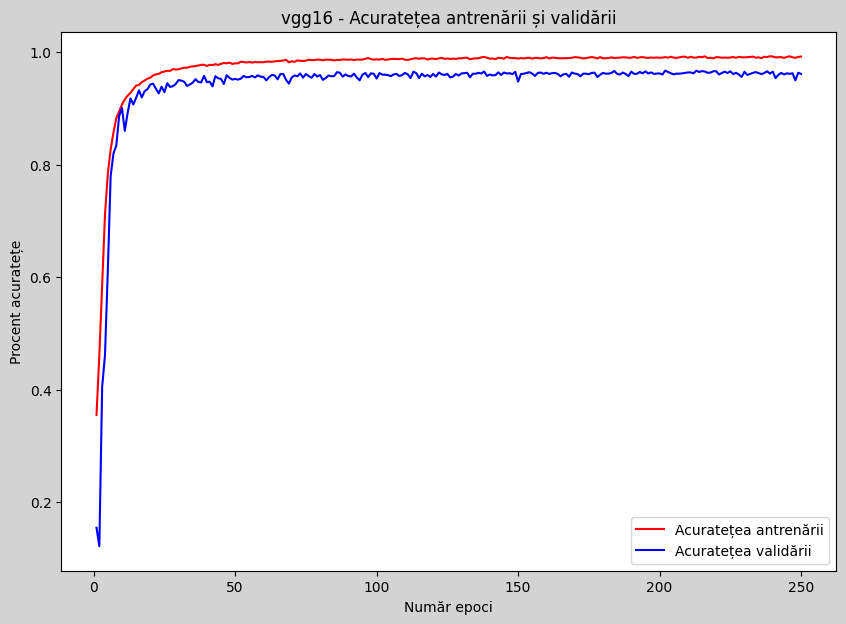

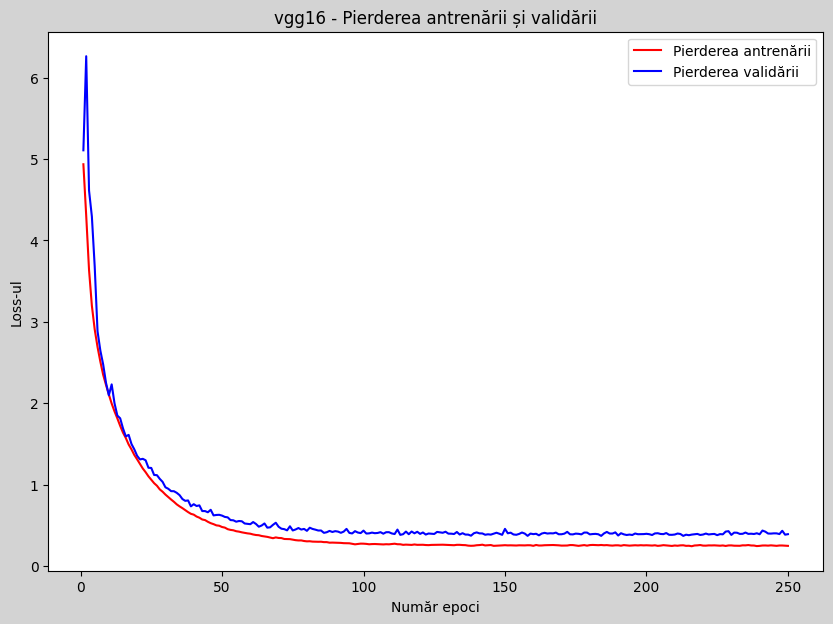

In [ ]:
# Celula de cod 2.3.6
# Grafic cu rezultatele
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 7), facecolor='lightgray')
plt.plot(epochs, acc, 'r', label='Acuratețea antrenării')
plt.plot(epochs, val_acc, 'b', label='Acuratețea validării')
plt.title(selected_model + ' - Acuratețea antrenării și validării')
plt.xlabel('Număr epoci')
plt.ylabel('Procent acuratețe')
plt.legend()


plt.figure(figsize=(10, 7), facecolor='lightgray')
plt.plot(epochs, loss, 'r', label='Pierderea antrenării')
plt.plot(epochs, val_loss, 'b', label='Pierderea validării')
plt.title(selected_model + ' - Pierderea antrenării și validării')
plt.xlabel('Număr epoci')
plt.ylabel('Loss-ul')
plt.legend()



plt.show()

In [ ]:
# Celula de cod 2.3.7
# Salvez modelul ca un fisier
models.save_model(model, join(model_filename))

In [ ]:
# Celula de cod 2.3.8
# Încarc modelul salvat și fac o predicție pentru un lot de date
model = models.load_model(join (model_filename))
for i in range(90, 100):
    print('Răspuns:', y_test_bin[i], ' Predicție:', model.predict(np.expand_dims(x_test[i], 0)))

Răspuns: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]  Predicție: [[3.7581361e-07 4.9392844e-07 2.0599259e-08 9.9999881e-01 4.4730553e-09
  4.4996628e-11 4.7641313e-09 6.6912150e-08 1.7870691e-07 9.1114840e-09
  6.8996016e-08]]
Răspuns: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  Predicție: [[4.5011463e-14 5.6820728e-15 4.5255128e-12 4.3585249e-15 4.1285545e-14
  2.7557158e-12 1.0000000e+00 1.3158211e-13 3.0013080e-16 7.3057411e-12
  1.4500137e-14]]
Răspuns: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]  Predicție: [[1.1670128e-06 1.0155930e-05 1.3979188e-04 5.7645790e-05 7.3163537e-06
  3.1371389e-06 1.0414753e-05 3.2107655e-06 2.0040384e-06 1.5940628e-05
  9.9974912e-01]]
Răspuns: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  Predicție: [[7.7620861e-08 9.9999595e-01 3.9891827e-08 5.0435619e-07 2.9771832e-09
  1.6875386e-08 6.9440403e-10 5.6961550e-08 2.6196675e-10 1.3533082e-07
  3.1303066e-06]]
Răspuns: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]  Predicție: [[3.4323874e-10 5.1736341e-12 3.5527767e-10 6.2845416e-11 1.0000000e+00


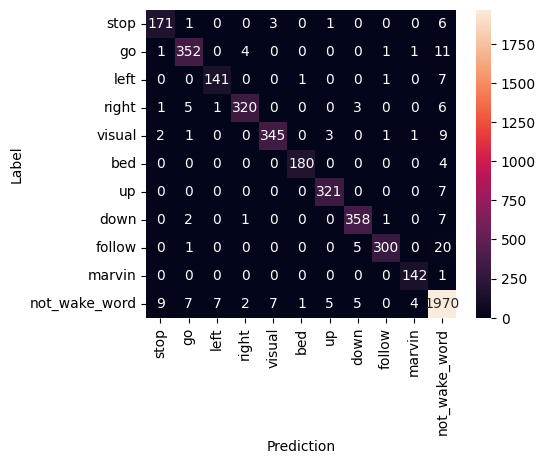

In [ ]:
import seaborn as sns

y_pred = model.predict(x_test)
y_true = y_test_bin.argmax(axis=1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred.argmax(axis=1))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, xticklabels=wake_words+['not_wake_word'], yticklabels=wake_words+['not_wake_word'], 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()


In [ ]:
# Celula de cod 2.3.9
# Evaluez modelul cu setul de testare
model.evaluate(x=x_test, y=y_test_bin)


149/149 [==============================] - 4s 23ms/step - loss: 0.3920 - acc: 0.9650


[0.3920118808746338, 0.9649674892425537]

# **3 Conversia TF Lite**

In [ ]:
# Celula de cod 3.1.1
from tensorflow import lite
from tensorflow.keras import models

In [ ]:
# Celula de cod 3.1.2
# Parametri
from datetime import datetime
timestamp = datetime.now()
dt_string = timestamp.strftime("%Y-%m-%d_%H-%M_")
tflite_filename = dt_string + selected_model + '_wake_word_model_lite.tflite'

print(tflite_filename)

2023-05-01_20-42_vgg16_wake_word_model_lite.tflite


In [ ]:
# Celula de cod 3.1.3
# Convertesc modelul în modelul TF Lite
model = models.load_model(model_filename)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(join(tflite_filename), 'wb').write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\radu2\AppData\Local\Temp\tmp2zkrq_sj\assets


62078996

# **4 Testare interactivă**

In [ ]:

import tensorflow as tf           # Construirea, antrenarea și evaluarea modelelor de învățare profundă
from tensorflow import lite
from tensorflow.keras import models

import librosa                    # Analiza și prelucrarea semnalelor audio - încărcarea și redimensionarea fișierelor audio



import os                         # Interacțiunea cu sistemul de operare pentru manipularea fișierelor și directoarelor
import tarfile                    # Manipularea fișierelor tar
import urllib.request             # Descarc fișiere de pe Internet
from os import listdir            # Manipularea fișierelor și directoarelor
from os.path import isdir, join  

from pydub import AudioSegment    # Conversia și redimensionarea fișierelor audio
import numpy as np                # Operații cu matrice și vectori
import python_speech_features     # Extragerea de caracteristici din semnalele audio




import random                     # Generarea de numere aleatoare - shuffle
import matplotlib.pyplot as plt   # Crearea de grafice și vizualizări
from IPython.display import Audio # Instrument pentru redarea fișierelor audio



In [ ]:
if selected_model == 'alexnet':
  model_filename = 'alexnet_wake_word_model.h5'

elif selected_model == 'vgg16':
    model_filename = 'vgg16_wake_word_model.h5'

elif selected_model == 'squeezenet':
   model_filename = 'squeezenet_wake_word_model.h5'

model = models.load_model(join( model_filename))

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Celula de cod 4.1.1

from tensorflow.keras import models

import python_speech_features     # Extragerea caracteristicilor
from pydub import AudioSegment    # Conversia și redimensionarea fișierelor audio


# Parameters
sample_rate = 8000                # Rata de eșantionare a probelor audio
num_mfcc = 16                     # Numărul de mfccs care urmează să fie generat
len_mfcc = 98                    # Lungimea matricei mffc pentru un singur enunț audio

#predicted_word = ['eight','five','four','nine','one','seven','six','three','two','zero','not wake word'] #PRIMA ORDINE
#predicted_word = ['six','five','four','nine','one','eight','not_wake_word','three','two','zero','seven'] #A DOUA VARIANTA
        #index =     0      1       2       3      4         5       6       7      8      9       10  
predicted_word = ['bed', 'down', 'follow', 'go', 'left', 'marvin','right', 'stop', 'up','visual','not_wake_word'] #A TREIA VARIANTA - problema la "seven"
#predicted_word = ['cinci','doi','noua','opt','patru','sapte','sase','trei','unu','zero','not_wake_word']#
#              ['stop', 'go', 'left', 'right', 'visual', 'bed','up', 'down', 'follow','marvin']
#predicted_word = [ 'bed', 'down', 'off', 'on', 'up', 'visual','not_wake_word']    

# Funcție pentru a crea MFCC pentru o cale data catre fisier
def calc_mfcc_delta(path):
  
  # Încărcac fișierul wave
  signal, fs = librosa.load(path, sr=sample_rate)

  # Generez MFCC din fisierul audio
  mfccs = python_speech_features.base.mfcc(signal,
                                          samplerate=fs,
                                          winlen=0.03,       # default 0.025
                                          winstep=0.01,      # default este 0.01
                                          numcep=num_mfcc,
                                          nfilt=26,
                                          nfft=512,        
                                          preemph=0.0,
                                          ceplifter=0,
                                          appendEnergy=True,
                                          winfunc=np.hanning)
  
  delta = python_speech_features.base.delta(mfccs, 2)

  mfccs_delta = np.append(mfccs, delta, axis=1)

  return mfccs_delta.transpose()

**Metoda1 - inregistrez live si testez**

In [ ]:
# Celula de cod 4.1.2
import os
import sounddevice as sd
from scipy.io.wavfile import write

def record(sec=3, save_path='', file_name='audio.wav'):
    print(f"Recording for {sec} seconds...")
    audio = sd.rec(int(sec * sample_rate), samplerate=sample_rate, channels=1)
    sd.wait()
    
    #Daca nu exista folderul, il creez
    save_folder = os.path.join(save_path)
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    save_file = os.path.join(save_path, file_name)
    write(save_file, sample_rate, audio)
    return AudioSegment(audio.tobytes(), frame_rate=sample_rate, sample_width=audio.dtype.itemsize, channels=1), save_file


Recording for 1 seconds...
(32, 98)


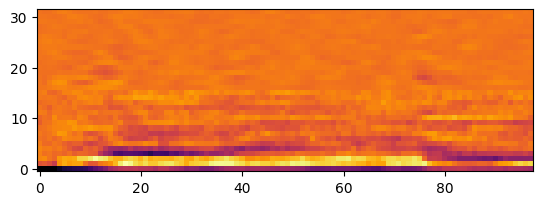

In [ ]:
# Celula de cod 4.1.3
save_path = 'test' # Modifica calea cu locul unde doresti sa salvezi fisierul audio
file_name = 'my_audio.wav' # Modifica numele fisierului cu ce doresti sa fie
audio_sample, audio_path = record(1, save_path, file_name)


#Calculez MFCC
mfccs = calc_mfcc_delta(audio_path)
print(mfccs.shape)


# Plotare MFCCs
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')
Audio(filename=audio_path)


In [ ]:
print(mfccs.shape[0])
print(mfccs.shape[1])

32
98


In [ ]:
# Celula de cod 4.1.5
in_tensor = np.float32(mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1], 1))
out_tensor = model.predict(in_tensor)
val = np.amax(out_tensor)							
ind = np.where(out_tensor == val)
prediction = ind[1].astype(int)

print('\nPredicție:', prediction, '\nCuvânt:', predicted_word[prediction.item(0)], '\nAcuratețe:', val, "\n")
print(out_tensor)
     


Predicție: [1] 
Cuvânt: down 
Acuratețe: 0.6456067 

[[4.7360905e-03 6.4560670e-01 9.8075827e-05 5.9831063e-03 5.8666023e-04
  2.9329793e-04 2.1683174e-04 3.3393517e-01 6.6101097e-04 5.2083484e-03
  2.6746881e-03]]


**Metoda2 - Folosind fișierele mele**

(32, 98)


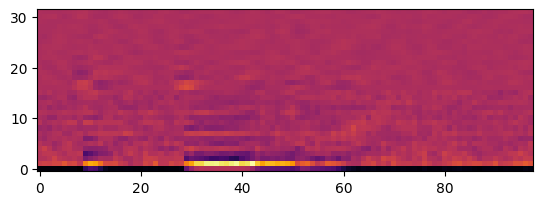

In [ ]:
# Celula de cod 4.2.1
audio_path='E://CorpusDeNumere//BazaDeDateCorpus//SpeechCommandsV02//up/0137b3f4_nohash_3.wav'
mfccs = calc_mfcc_delta(audio_path)
print(mfccs.shape)

# Plotare MFCCs
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')
Audio(filename=audio_path)

In [ ]:
# Celula de cod 4.2.2 - pentru shape (32,50,1)
in_tensor = np.float32(mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1], 1))
out_tensor = model.predict(in_tensor)
val = np.amax(out_tensor)							
ind = np.where(out_tensor == val)
prediction = ind[1].astype(int)

print('\nPredicția:', prediction, '\nCuvânt:', predicted_word[prediction.item(0)], '\nAcuratețe:', val, "\n")
print(out_tensor)


Predicția: [8] 
Cuvânt: up 
Acuratețe: 0.99999976 

[[1.8260107e-09 2.1088792e-11 4.8008877e-09 7.1869682e-10 1.7495908e-10
  1.0373775e-10 7.5617138e-11 2.0110983e-07 9.9999976e-01 7.7816406e-11
  4.2980743e-09]]
